In [ ]:
# Task : To predict the Dissolved Oygen using Linear Regression Model

In [195]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import random as rnd
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [196]:
# Read the data from csv file
df=pd.read_csv('Raw data.csv')

In [197]:
# printing the first five entries of a given dataset
df.head()

,Time,Devicename,Temperature,TDS,PH,DO
0,Wed Jul 07 2021 14:15:09 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,13.61598,9.91
1,Wed Jul 07 2021 14:16:14 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,13.12313,9.90
2,Wed Jul 07 2021 14:17:18 GMT+0530 (India Stand...,867378035207325,29.0000,0.0,13.55723,9.90
3,Wed Jul 07 2021 14:18:23 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,14.00000,9.90
4,Wed Jul 07 2021 14:19:28 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,14.00000,9.90


In [198]:
#Define the target y and non-target,learning variables[x] then removing non-numeric fields ['Time' & 'Devicename']
df = df.drop(['Time','Devicename'],axis=1)
x = df.drop("DO",axis=1)
y = df["DO"]
df.head()

,Temperature,TDS,PH,DO
0,29.0625,0.0,13.61598,9.91
1,29.0625,0.0,13.12313,9.90
2,29.0000,0.0,13.55723,9.90
3,29.0625,0.0,14.00000,9.90
4,29.0625,0.0,14.00000,9.90


<AxesSubplot:ylabel='Frequency'>

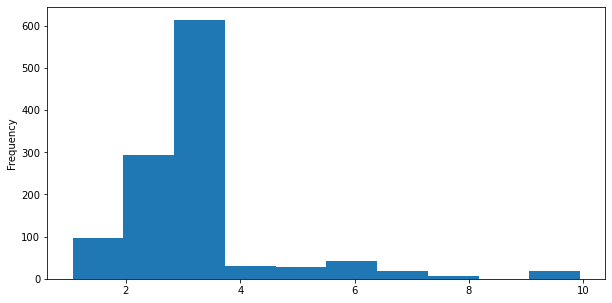

In [199]:
# Plot histogram of target/dependant variable (DO) to see distribution
plt.figure(figsize=(10,5))
df['DO'].plot(kind="hist")

<AxesSubplot:>

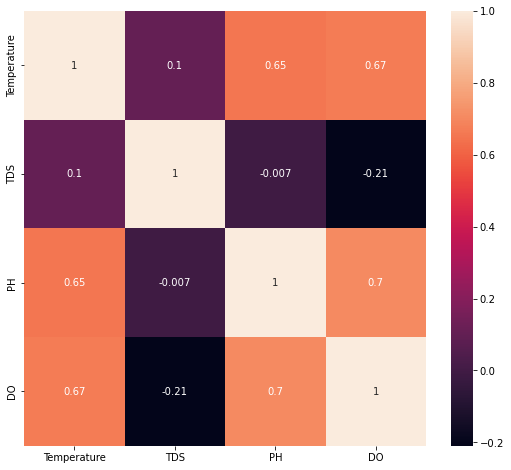

In [200]:
# Using Pearson Correlation {corr() function} plot all correlations (positive (0.5-1.0) and negative (-0.5--1.0))
plt.figure(figsize=(9,8))
cor=df.corr()
sns.heatmap(cor,annot=True)

In [201]:
# Identifying positive correlation with target variable i.e., DO 
target_corr=abs(cor["DO"])# DO is a target variable
positive_corr_target=target_corr[target_corr>(0.5)]
positive_corr_target

Temperature    0.669232
PH             0.702880
DO             1.000000
Name: DO, dtype: float64

In [202]:
# Detremining correlation between these fields Temperature and PH
print(df[["Temperature","PH"]].corr())

             Temperature        PH
Temperature     1.000000  0.650587
PH              0.650587  1.000000


In [203]:
# Drop unneceassary columns (TDS low correlation) and keep PH, DO and Temperature
df=df.drop(["TDS"],axis=1)
df.head()

,Temperature,PH,DO
0,29.0625,13.61598,9.91
1,29.0625,13.12313,9.90
2,29.0000,13.55723,9.90
3,29.0625,14.00000,9.90
4,29.0625,14.00000,9.90


In [204]:
#Create test and train variables using test_train_split from sklearn library
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.25)#test size is 25% of data train is 75%
print(x_train.shape,y_train.shape)#862 members in test
print(x_test.shape,y_test.shape)#288 members in test

(862, 3) (862,)
(288, 3) (288,)


In [205]:
#Fitting the Linear Regression model - as all columns are numeric
lrm=linear_model.LinearRegression()
lrm_model=lrm.fit(x_train,y_train)
lrm_predictions=lrm.predict(x_test)

In [206]:
lrm_predictions[0:10]

array([2.65, 1.73, 2.27, 2.04, 3.78, 6.1 , 3.37, 3.24, 1.67, 3.31])

Text(0, 0.5, 'Predicted Values')

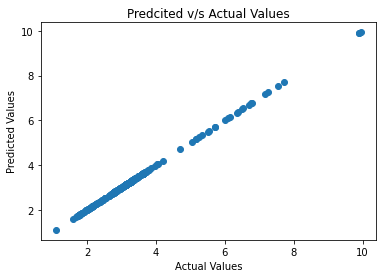

In [207]:
#Plot the predictions with a scatter plot
plt.scatter(y_test,lrm_predictions)
plt.title("Predcited v/s Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [208]:
print('Score:',lrm_model.score(x_test,y_test))

Score: 1.0


In [209]:
#Add the predictions , actuals , predictors (non-dependant variables) into a single dataframe for comparison
df2=pd.DataFrame(x_test)
df2['DO Actuals']=y_test
df2['DO Predictions']=lrm_predictions

In [210]:
df2.head()

,Temperature,PH,DO,DO Actuals,DO Predictions
202,25.8125,5.377826,2.65,2.65,2.65
812,26.1250,5.325606,1.73,1.73,1.73
221,25.8125,5.270116,2.27,2.27,2.27
805,26.1875,5.260324,2.04,2.04,2.04
966,25.0625,5.416993,3.78,3.78,3.78
